## Pima Indian Diabetes Data
### US National Institute of Diabetes and Digestive and Kidney Diseases

## Problem Statement:
A population of women who were at least 21 years old, of Pima Indian heritage and living near Phoenix, Arizona, was tested for diabetes according to World Health Organization criteria. The data was collected by the US National Institute of Diabetes and Digestive and Kidney Diseases.
- Identify whether the person will suffere from diabetes or not

Approach:
    - Step 1: Importing Data
    - Step 2: Inspecting and understanding the Dataframe
    - Step 3: Data Preparation
    - Step 4: Test-Train Split
    - Step 5: Feature Scaling - MinMAxScaler or StandardScaler
    - Step 6: Looking at Correlations
    - Step 7: Model Building
    - Step 8: Feature Selection Using RFE
        - Iterations for finalizing features
    - Step 9: Metrics beyond simply accuracy
    - Step 10: Model Evaluation Using ROC Plot
    - Step 10: Finding Optimal Cutoff Point
    - Step 11: Precision and recall tradeoff
    - Step 12: Making predictions on the test set



# Step 1: Importing Data

In [2]:
'''
All Imports
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
diabetes = pd.read_csv("pima_indian_diabetes.csv")
data_dictionary = pd.read_csv("pima_indian_diabetes_data_dictionary.csv",header=None)

In [9]:
# Check the Data Columns
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
No_Times_Pregnant    392 non-null int64
Plasma_Glucose       392 non-null int64
Diastolic_BP         392 non-null int64
Triceps              392 non-null int64
Insulin              392 non-null int64
BMI                  392 non-null float64
Age                  392 non-null int64
Diabetes             392 non-null int64
dtypes: float64(1), int64(7)
memory usage: 24.6 KB


In [11]:
# Map the data to Data Dictionary
data_dictionary.columns = ['Name','Description']
data_dictionary['dtype'] = diabetes.dtypes.values
data_dictionary['Value'] = diabetes.loc[0].values

In [23]:
data_dictionary

,Name,Description,Value,dtype
0,No_Times_Pregnant,Number of times pregnant,1.0,int64
1,Plasma_Glucose,Plasma glucose concentration after 2 hours in ...,89.0,int64
2,Diastolic_BP,Diastolic blood pressure (mm Hg),66.0,int64
3,Triceps,Triceps skin fold thickness (mm),23.0,int64
4,Insulin,2-Hour serum insulin (mu U/ml),94.0,int64
5,BMI,Body mass index (weight in kg/(height in m)^2),28.1,float64
6,Age,Age (years),21.0,int64
7,Diabetes,Class variable (0 or 1),0.0,int64


# Step 2: Inspecting and understanding the Dataframe


In [24]:
diabetes.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


In [26]:
diabetes.shape

(392, 8)

In [25]:
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No_Times_Pregnant,392.0,3.301020,3.211424,0.0,1.00,2.0,5.0,17.0
Plasma_Glucose,392.0,122.627551,30.860781,56.0,99.00,119.0,143.0,198.0
Diastolic_BP,392.0,70.663265,12.496092,24.0,62.00,70.0,78.0,110.0
Triceps,392.0,29.145408,10.516424,7.0,21.00,29.0,37.0,63.0
Insulin,392.0,156.056122,118.841690,14.0,76.75,125.5,190.0,846.0
BMI,392.0,33.086224,7.027659,18.2,28.40,33.2,37.1,67.1
Age,392.0,30.864796,10.200777,21.0,23.00,27.0,36.0,81.0
Diabetes,392.0,0.331633,0.471401,0.0,0.00,0.0,1.0,1.0


In [29]:
#Check the Distribution of Yes and No
pd.concat([diabetes['Diabetes'].value_counts(),diabetes['Diabetes'].value_counts(normalize=True)],axis=1)

,Diabetes,Diabetes
0,262,0.668367
1,130,0.331633


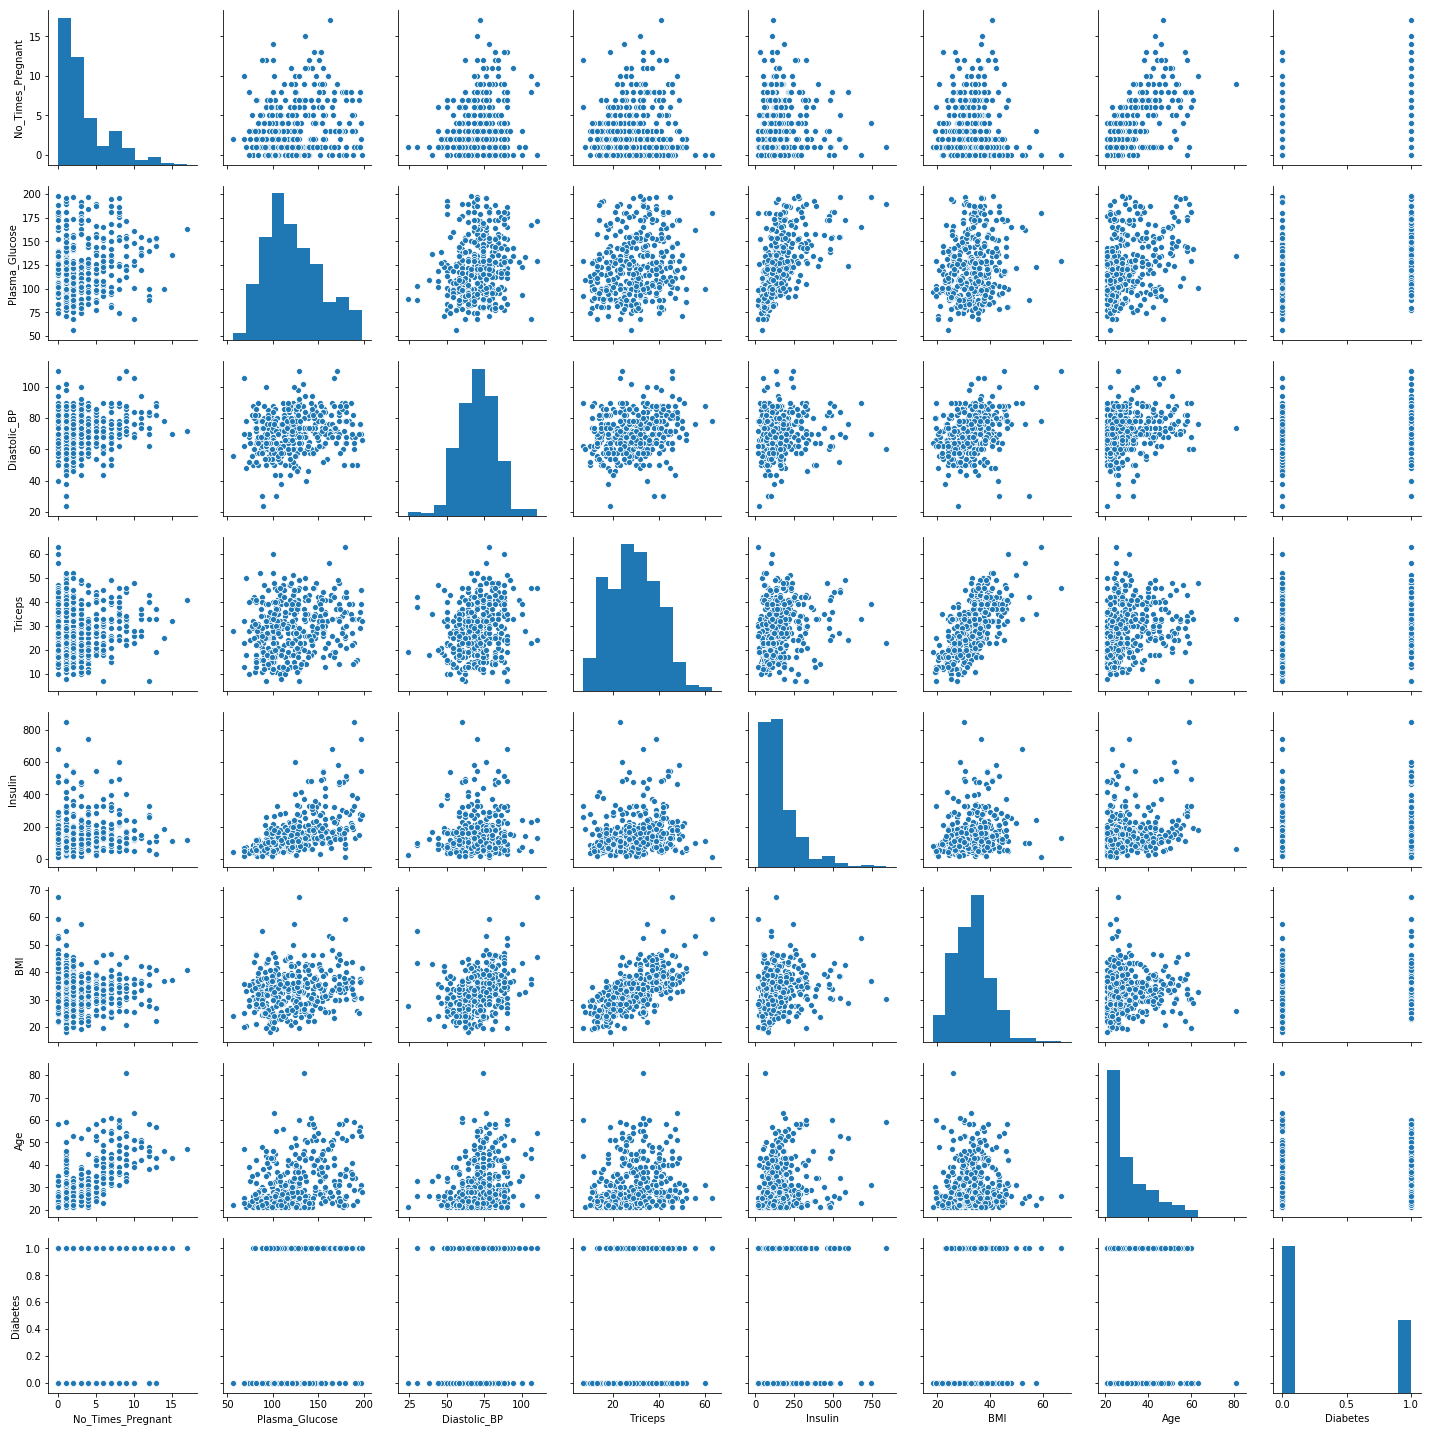

In [30]:
sns.pairplot(diabetes)

### Scatter Matrix to identify how the target points are scattered as per various Features

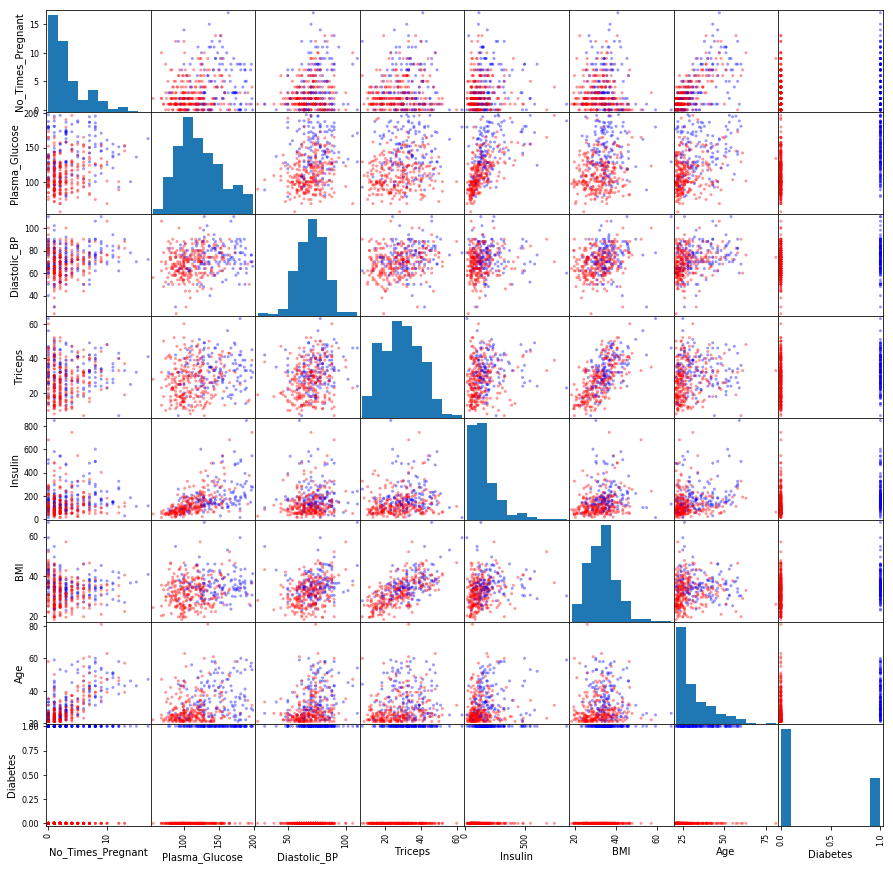

In [33]:
color_dic = {0:'red', 1:'blue'}
colors = diabetes['Diabetes'].map(lambda x: color_dic.get(x))

sm = pd.plotting.scatter_matrix(diabetes, c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

# Step 3: Data Preparation

In [35]:
# All the Columns are in Numerical value hence no data preparation needed

# Step 4: Test-Train Split

In [52]:
from sklearn.model_selection import train_test_split

X = diabetes.drop('Diabetes',axis=1)
y = diabetes['Diabetes']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
cols = X_train.columns

(274, 7)
(118, 7)
(274,)
(118,)


# Step 5: Feature Scaling - MinMaxScaler or StandardScaler


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
minmax = MinMaxScaler()

In [56]:
X_train_sc = scaler.fit_transform(X_train[cols])
X_train_sc = pd.DataFrame(X_train_sc,columns=cols)
print(X_train_sc)

In [61]:
X_train_mm = minmax.fit_transform(X_train[cols])
X_train_mm = pd.DataFrame(X_train_mm,columns=cols)
print(X_train_mm.describe().transpose())

                   count      mean       std  min       25%       50%  \
No_Times_Pregnant  274.0  0.189352  0.187606  0.0  0.058824  0.117647   
Plasma_Glucose     274.0  0.474922  0.220506  0.0  0.307143  0.450000   
Diastolic_BP       274.0  0.512226  0.154892  0.0  0.400000  0.512500   
Triceps            274.0  0.415301  0.200289  0.0  0.250000  0.415094   
Insulin            274.0  0.174849  0.147098  0.0  0.075812  0.134176   
BMI                274.0  0.308958  0.146812  0.0  0.212679  0.308793   
Age                274.0  0.220195  0.235134  0.0  0.047619  0.119048   

                        75%  max  
No_Times_Pregnant  0.294118  1.0  
Plasma_Glucose     0.621429  1.0  
Diastolic_BP       0.625000  1.0  
Triceps            0.566038  1.0  
Insulin            0.214801  1.0  
BMI                0.391104  1.0  
Age                0.333333  1.0  


# Step 6: Looking at Correlations - Dropping Highly Correalted Features

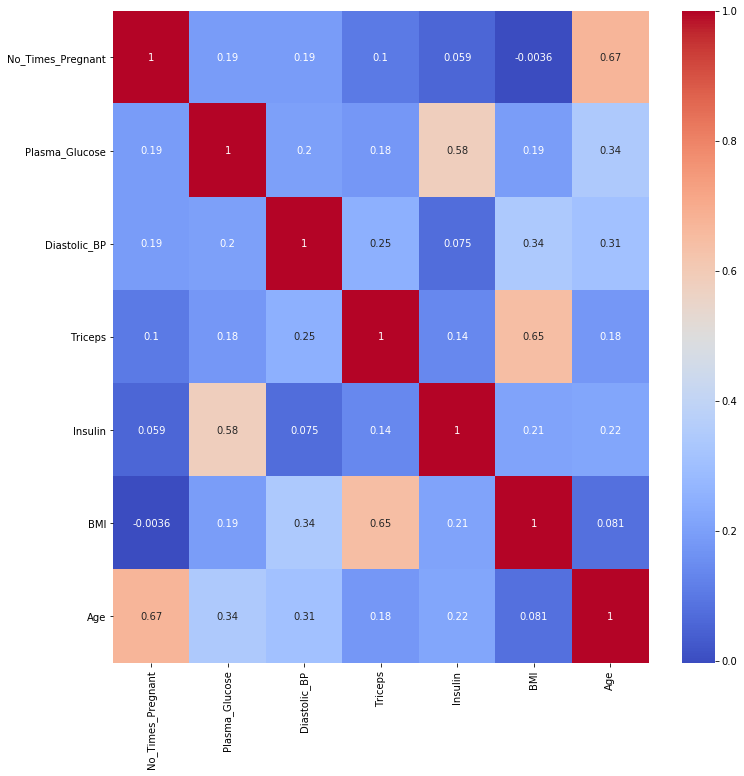

In [65]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train_mm.corr(),annot=True,cmap='coolwarm')

# Step 7: Model Building

In [73]:
import statsmodels.api as sm

y_train = y_train.values.reshape(-1)

In [74]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_mm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  274
Model:                            GLM   Df Residuals:                      266
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -122.11
Date:                Sun, 21 Jul 2019   Deviance:                       244.22
Time:                        14:37:07   Pearson chi2:                     264.
No. Iterations:                     5   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1878      0.756     -6.864      0.000      -6.669      -3.706
No_Times_Pregnant     1.5575      1.124      1.386      0.166      -0.645       3.760
Plasma_Glucose        5.7310      0.980      5.851      0.000       3.811       7.651
Diastolic_BP         -0.4826      1.125     -0.429      0.668      -2.687       1.722
Triceps               0.6859      1.027      0.668      0.504      -1.326       2.698
Insulin              -0.8890      1.222     -0.728      0.467      -3.283       1.505
BMI                   3.1620      1.470      2.151      0.031       0.281       6.043
Age                   1.5469      0.953      1.624      0.104      -0.321       3.414
=====================================================================================
"""

In [86]:
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression()

m2 = logres.fit(X_train_mm,y_train)

C:\Users\HumanMachine\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [88]:
m2.coef_

array([[ 0.81558516,  2.92855548, -0.30637226,  0.62081143,  0.42976858,
         0.9937256 ,  1.30384962]])

In [89]:
from sklearn import metrics

In [94]:
# make predictions
predictions = m2.predict(X_test)
#y_test = diabetes_test.iloc[:,7]

# Compute evaluation scores and round them off to two decimal places
# note that the test case may fail if the metrics are not rounded off 
accuracy_score = metrics.accuracy_score(y_test, predictions)
precision_score = metrics.precision_score(y_test, predictions)
recall_score = metrics.recall_score(y_test, predictions)
f1_score = (2 *precision_score* recall_score)/(precision_score + recall_score)

In [98]:
f1_score

0.4871794871794871

# Step 8: Feature Selection Using RFE
    - Iterations for finalizing features

In [82]:
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logres,4)

rfe = rfe.fit(X_train_mm,y_train)

C:\Users\HumanMachine\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HumanMachine\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HumanMachine\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HumanMachine\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
rfe.support_

array([ True,  True, False, False, False,  True,  True])

In [84]:
list(zip(X_train_mm.columns,rfe.support_,rfe.ranking_))

[('No_Times_Pregnant', True, 1),
 ('Plasma_Glucose', True, 1),
 ('Diastolic_BP', False, 4),
 ('Triceps', False, 2),
 ('Insulin', False, 3),
 ('BMI', True, 1),
 ('Age', True, 1)]

# Step 9: Metrics beyond simply accuracy

# Step 10: Model Evaluation Using ROC Plot

# Step 10: Finding Optimal Cutoff Point

# Step 11: Precision and recall tradeoff

# Step 12: Making predictions on the test set